## Example for Prediction (Part 3)

#### **TO DO**:
- Split dataset in train/test
- Prediction after feature importance

[Interactive Widgets](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/): [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) ; [Using Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

[graphviz](https://graphviz.readthedocs.io/en/stable/manual.html)


Filename:  C:/Users/JTavares/Documents/GitHub/Tese/3/Dados de defeito enviados - processed.csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import CSV

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn import metrics
from IPython.display import display, clear_output, Markdown

from google.colab import files
import io

In [ ]:
!ls "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv"

'/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv'


In [ ]:
path = "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv"

print("Filename: ", path)

df = pd.read_csv(path)

display(df.head())
print("Shape:", df.shape)

Filename:  /content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv


,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Quant. Prod.,out_Total c/Defeito
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,10,2020,3,0,98,0
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,10,2020,3,0,200,0
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,62,0
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,92,0
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5


Shape: (1068, 16)


In [ ]:
df.rename(columns = {'out_Total c/Defeito': 'out_defects', 'out_Quant. Prod.':'out_Qtd.ordem'}, inplace = True)

df['Qtd.ordem'] = df.loc[:, 'out_Qtd.ordem']

---

### Select data to be observed
- Select features to be evaluated
- Select level of visualisation

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

data = df.keys()
dtypes = df.dtypes
features = [out for out in data if "out_" not in out]
output = [out for out in data if "out_" in out]
checkboxes = [widgets.Checkbox(value=True, description=label) for label in features]
out_checkboxes = [widgets.Checkbox(value=True, description=label) for label in output]
out_options = [widgets.Dropdown(options=['sum', 'mean', 'max', 'min'], description='Aggregate options:') for x in output]
out_qt = widgets.ToggleButtons(options=output, description='Detected defects:', style = {'description_width': 'initial'})
butt = widgets.Button(description="OK", icon="check")


lst = [[], [], []] ; out_lst = [[], []]
for i in range(len(checkboxes)):
    lst[i%3].append(checkboxes[i])

# for i in range(len(out_checkboxes)):
#     out_lst[0].append(out_checkboxes[i])
#     out_lst[1].append(out_options[i])


tab1 = widgets.HBox([widgets.VBox(lst[0]), widgets.VBox(lst[1]), widgets.VBox(lst[2])])
tab2 = widgets.HBox([out_qt]) # widgets.VBox(out_lst[0]), widgets.VBox(out_lst[1]), out_qt])

outt = widgets.Output()
selected_features = []
selected_output = []

def on_check_clicked(b):
    with outt:
        clear_output()
        global selected_data
        global selected_output
        selected_data = []
        selected_output = []
        for i in range(0, len(checkboxes)):
            if checkboxes[i].value == True:
                selected_data = selected_data + [checkboxes[i].description]
#         for i in range(0, len(out_checkboxes)):
#             if out_checkboxes[i].value == True:
#                 selected_output[out_checkboxes[i].description] = out_options[i].value
        if output[0] != out_qt.value:
            selected_output = [out_qt.value, output[0]]
        else:
            selected_output = output

        print("Selected data: ", selected_data)
        print("Selected output: ", selected_output)




tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Features')
tab.set_title(1, 'Output')
widgets.VBox(children=[tab])

butt.on_click(on_check_clicked)
display(tab, butt, outt)

Button(description='OK', icon='check', style=ButtonStyle())

Output()

### Create measure ratios

In [ ]:
df["percentage"] = df[selected_output[0]]/df[selected_output[1]]*100

# create ratio from percentage
total_percentage = df["percentage"].sum()

df["ratio"] = df["percentage"]/total_percentage * 100

total_ratio = df["ratio"].max()
print("Max value:", total_ratio)
df1 = df[df['percentage'] >= 30]


Max value: 7.528403052322977


In [ ]:
df1.head()

,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Qtd.ordem,out_defects,Qtd.ordem,percentage,ratio
5,P1,69,PR,Ber,142,34,3.8,NG,14.0,48.0,10,2020,4,0,69,43,69,62.318841,7.528403
77,P2,28,CA,Flo,180,70,8.0,NG,20.0,56.0,11,2020,0,0,28,9,28,32.142857,3.883005
325,P1,63,DI,Ber,35,34,3.8,CLVG,13.0,61.0,1,2021,2,3,63,30,63,47.619048,5.752600
347,P1,151,LA,Del,195,30,3.0,CLVG,19.0,63.0,1,2021,1,3,151,50,151,33.112583,4.000153
436,P1,100,LA,Del,195,30,3.0,ESVG,21.0,49.0,2,2021,1,4,100,38,100,38.000000,4.590575


In [ ]:
# df = df2 # para dataset completo
df2 = df.copy()

In [ ]:
ranges = [-0.001, 0, 0.001, 0.01, 0.1, 1, 5, 10, 30, 50,100]
ranges1 = [0, 2, 5, 10, 30, 50,100,200, 300, 600]
ranges2 = [-500, -0.01, 0, 3, 10, 60, 100, 300, 600, 1200, 3000, 6000, 15000, 100000]
display(df['percentage'].groupby(pd.cut(df['percentage'], ranges)).count())

# df = df2 # para dataset completo
# df2 = df.copy()
df3 = df2[df2['percentage'] <= 10]
print("\n")
display(df3['percentage'].groupby(pd.cut(df3['percentage'], ranges)).count())
print("\n")

percentage
(-0.001, 0.0]    931
(0.0, 0.001]       0
(0.001, 0.01]      0
(0.01, 0.1]        0
(0.1, 1.0]        48
(1.0, 5.0]        43
(5.0, 10.0]       29
(10.0, 30.0]      10
(30.0, 50.0]       6
(50.0, 100.0]      1
Name: percentage, dtype: int64

percentage
(-0.001, 0.0]    931
(0.0, 0.001]       0
(0.001, 0.01]      0
(0.01, 0.1]        0
(0.1, 1.0]        48
(1.0, 5.0]        43
(5.0, 10.0]       29
(10.0, 30.0]       0
(30.0, 50.0]       0
(50.0, 100.0]      0
Name: percentage, dtype: int64

In [ ]:
# df = df6
df = df2 # para dataset completo

# selected_data = ['Qtd.ordem', "Tipo de operação", 'n_operations', 'Mês', 'dim1',
# 'dim2', 'dim3', 'car1', 'dim1_1', 'dim1_2', 'car1_1', 'f_prep', 'li_bd', 'Difference']

df.dropna(subset = ["T (ºC)"], inplace=True)
df.dropna(subset = ["Caracteristica A"], inplace=True)

print(df.isnull().sum())

# df['dim1_2'].fillna(0, inplace=True)

Processo_ P         0
Quant. Prod.        0
Caracteristica T    0
Caracteristica L    0
Comp.               0
Larg.               0
Espess.             0
Caracteristica A    0
T (ºC)              0
%HR                 0
month               0
year                0
week day            0
months              0
out_Qtd.ordem       0
out_defects         0
Qtd.ordem           0
percentage          0
ratio               0
dtype: int64


In [ ]:
print(df['Caracteristica L'].value_counts())
# df = df[df['car1_1'] == 'BD-AE']
# df = df[df["Tipo de operação"] == "APLICAÇÃO DE TINTA DE IMPRESSÃO"]

Ber    284
Dub     96
Pom     79
Hil     76
Dus     57
Lon     42
Flo     34
Sla     32
Bal     29
Cli     29
Che     23
Fl      23
Joi     23
Aur     22
Ape     21
Del     19
Ste     16
Str     14
Pet     14
Vol     14
Sto     13
Mul     12
Kob     12
Jaz     11
Kar      9
Low      7
Edg      7
Nar      5
Cro      5
Bas      4
Rad      4
Ski      4
Alb      3
Rob      3
Per      3
Pra      2
To       2
Kal      2
Dri      1
Tok      1
Com      1
Mes      1
Nic      1
May      1
Lag      1
Hig      1
Name: Caracteristica L, dtype: int64


### Prepare targets (for classification)

Prepare Categorical Output by defining n categories for the target.


- [ ] 6 Sigma --> how many categories?
0. 0% (no defects)
1. defects > 69%
2. defects: 69%-31%
3. defects: 31%-6,7%
4. defects: 6,7%-0.62%
5. defects: 0.62%-0.023%
6. defects: 0.023%-0%

- [ ] 2-4 categories

In [ ]:
w_bins = widgets.RadioButtons(
    options=['2 levels', '3 levels', '6 Sigma levels'],
    description='Bins:',
    disabled=False
)

w_bins

RadioButtons(description='Bins:', options=('2 levels', '3 levels', '6 Sigma levels'), value='2 levels')

In [ ]:
y_mean = df['percentage'].mean()
y_max = df['percentage'].max()
print("Percentage mean: ", y_mean)
print("Percentage max: ", y_max)

bins_6s = [-0.0001, 0, 0.023, 0.62, 6.7, 31, 69, 100]; bins_2 = [-1, 0, y_max] ; bins_3 = [-1, 0, y_mean, y_max]
labels_6s = [0, 1, 2, 3, 4, 5, 6] ; labels_2 = [0, 1] ; labels_3 = [0, 1, 2]

if w_bins.value == "2 levels":
    bins = bins_2 ; labels = labels_2
elif w_bins.value == "3 levels":
    bins = bins_3 ; labels = labels_3
elif w_bins.value == "6 Sigma levels":
    bins = bins_6s ; labels = labels_6s
else:
    print("Choose bins levels")

print("Bins:", w_bins.value)

df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)

if df["binned"].isnull().sum() > 0:
    df.dropna(subset = ["binned"], inplace=True)

display(df.head())
print(df.shape)

Percentage mean:  0.778723423534922
Percentage max:  62.31884057971014
Bins: 2 levels


,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Qtd.ordem,out_defects,Qtd.ordem,percentage,ratio,binned
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,10,2020,3,0,98,0,98,0.000000,0.000000,0
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,10,2020,3,0,200,0,200,0.000000,0.000000,0
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,62,0,62,0.000000,0.000000,0
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,92,0,92,0.000000,0.000000,0
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5,152,3.289474,0.397384,1


(1063, 20)


#### Convert Imbalanced Dataset into Balanced Dataset
if needed

[link](https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5)

In [ ]:
ranges = [-2000, -1000, -100, -30, -10, 0, 3, 5,10,20,30,50,100,1000,10000]
display(df['out_defects'].groupby(pd.cut(df['out_defects'], ranges)).count())

out_defects
(-2000, -1000]      0
(-1000, -100]       0
(-100, -30]         0
(-30, -10]          0
(-10, 0]          926
(0, 3]             45
(3, 5]             23
(5, 10]            28
(10, 20]           19
(20, 30]           12
(30, 50]            9
(50, 100]           1
(100, 1000]         0
(1000, 10000]       0
Name: out_defects, dtype: int64

In [ ]:
df_count = df["binned"].value_counts()
df_unique = df['Caracteristica T'].nunique()

display(df_count)
print("Unique values for 'Caracteristica A': ", df_unique)

0    926
1    137
Name: binned, dtype: int64

Unique values for 'Caracteristica A':  18


In [ ]:
# load dataset
data = df

selected_data = ['Processo_ P', 'Comp.', 'Larg.', 'Espess.', 'T (ºC)', 
                 '%HR', 'week day', 'months', 'Qtd.ordem'] #'month', 'year', 'Caracteristica T', 'Caracteristica L', 'Caracteristica A',

# selected_data = ['Qtd.ordem', 'n_operations', 'Mês', 'dim1',
# 'dim2', 'dim3', 'dim1_1', 'dim1_2', 'f_prep', 'li_bd', 'Difference']

# selected_data = ['Qtd.ordem', 'n_operations', 'Mês', 'dim2', 'dim1_1', 'dim1_2', 'Difference']


# feature matrix
X = data[selected_data]

# target vector
y = df['binned']

display(X.head())
print("X (shape):", X.shape, "; Y (shape):", y.shape)

,Processo_ P,Comp.,Larg.,Espess.,T (ºC),%HR,week day,months,Qtd.ordem
0,P2,140,38,5.0,25.0,31.0,3,0,98
1,P2,38,38,5.0,25.0,31.0,3,0,200
2,P2,70,30,5.0,25.0,31.0,3,0,62
3,P2,70,30,5.0,25.0,31.0,3,0,92
4,P1,224,34,3.0,14.0,48.0,4,0,152


X (shape): (1063, 9) ; Y (shape): (1063,)


### Encode Categorical Data (inputs)

We need to encode our categorical data to numbers. There are 3 techniques to encode data:
1. **Integer Encoding**
2. **One Hot Encoding**
3. **Learned Embedding**

[Categorical data for deep learning](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

First, *One Hot Enconding* was tested. For this task, the numeric and categorical features were defined.

*comment: with this task, the number of features was reduced from 416 to 212*

In [ ]:
w_tt = widgets.RadioButtons(
    options=['Random', 'Ordered'],
    description='Train/Test Split:',
    disabled=False,
    style = {'description_width': 'initial'}
)

w_size = widgets.IntSlider(
    value=80,
    min=0,
    max=100,
    step=1,
    description='(%) Training set size:',
    disabled=False,
#     continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Training and test data sets"))
display(w_tt, w_size)
print(" ")

### Training and test data sets

RadioButtons(description='Train/Test Split:', options=('Random', 'Ordered'), style=DescriptionStyle(descriptio…

IntSlider(value=80, description='(%) Training set size:', style=SliderStyle(description_width='initial'))

In [ ]:
from sklearn.model_selection import train_test_split

def prepare_inputs(X_train):
    X_train = pd.get_dummies(X_train)
    return X_train

# prepare input data
X_enc = prepare_inputs(X)
y_class = df['binned']

X_enc.rename(columns = {'Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO':'APL. ESMALTE BRANCO','Tipo de operação_APLICAÇÃO DE TINTA DE IMPRESSÃO': 'APL. TINTA IMPRESSÃO',
 'Tipo de operação_APLICAÇÃO DE VERNIZ': 'APL. DE VERNIZ','Tipo de operação_CORTE DE FOLHA':'CORTE DE FOLHA','Tipo de operação_EMBALAMENTO':'EMBALAMENTO'}, inplace = True)
X_enc.drop(['Processo_ P_P2'], axis=1, inplace=True)

test_size = 1 - (w_size.value/100)

if w_tt.value == "Random":
    shuffle = True
else: shuffle = False

print("Shuffle:", shuffle, "; Test size:", test_size)

# shuffle is used to randomly mix the dataset
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_class, test_size=test_size, shuffle=shuffle)

print("\nX (shape):", X_train.shape, X_test.shape)
print("y (shape):", y_train.shape, y_test.shape)

display(X_train.head())
# print(X_train.isnull().sum())

Shuffle: True ; Test size: 0.19999999999999996

X (shape): (850, 9) (213, 9)
y (shape): (850,) (213,)


,Comp.,Larg.,Espess.,T (ºC),%HR,week day,months,Qtd.ordem,Processo_ P_P1
889,30,44,3.0,23.0,45.0,3,6,50,0
411,163,36,5.0,15.0,61.0,3,3,101,0
578,24,42,3.0,25.0,20.0,1,4,100,0
963,107,49,3.0,31.0,25.0,4,7,101,0
325,35,34,3.8,13.0,61.0,2,3,63,1


### Select score to be evaluated

F1 score was selected as evaluation criterion

--> criar widget para selecionar critério: F1, F2, F0.5, Accuracy, Balanced_accuracy

In [ ]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')

scoring = widgets.Dropdown(
    options=['balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'roc_auc', 'average_precision'],
    description='Scoring:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_cv = widgets.IntSlider(
    value=5, min=2, max=10, step=1,
    description='K-Folds (CV):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Cross Validation (CV)"))
display(dt_cv)
display(Markdown("### Evaluation criteria"))
display(scoring)

### Cross Validation (CV)

IntSlider(value=5, continuous_update=False, description='K-Folds (CV):', max=10, min=2, style=SliderStyle(desc…

### Evaluation criteria

Dropdown(description='Scoring:', options=('balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'r…

## Classification and Regression Trees (CART)

[CART explanation](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/)

The next examples are calculated using this [Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/) methods.

### Select parameters

In [ ]:
dt_criterion = widgets.Dropdown(
    options=['gini', 'entropy'],
    description='Criterion:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_depth = widgets.Dropdown(
    options=[3, 4, 6, 8, 10, 15, None],
    value=None,
    description='Max Depth:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_weighted = widgets.Checkbox(
    value=True,
    description='class_weighted',
    disabled=False,
    indent=False,
    style = {'description_width': 'initial'}
)

dt_min_split = widgets.IntSlider(
    value=4,
    min=2,
    max=10,
    step=1,
    description='Min samples split:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

dt_min_leaf = widgets.IntSlider(
    value=2,
    min=1,
    max=10,
    step=1,
    description='Min samples leaf:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Parameters for Decision Tree"))
display(widgets.VBox([widgets.HBox([dt_criterion, dt_depth]),
                      widgets.HBox([dt_min_leaf, dt_min_split]),
                      widgets.HBox([dt_weighted])]))

### Parameters for Decision Tree

In [ ]:

# dt_criterion, dt_depth, dt_min_leaf, dt_min_split, dt_bootstrap, dt_weighted

criterion = str(dt_criterion.value)
max_depth = dt_depth.value
min_samples_split = int(dt_min_split.value)
min_samples_leaf = int(dt_min_leaf.value)
if dt_weighted.value == True: class_weight = 'balanced'
else: class_weight = None

parameters = {'criterion': criterion,
'max_depth': max_depth,
'class_weight': class_weight,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

### CART Classification Feature Importance
**Decision tree** for feature importance on a classification problem

Larg.,68.64927
Qtd.ordem,13.24772
Processo_ P_P1,18.10302

Max score: 68.64926508747949 (Feature: Larg. )

Filename:  plot-CART- 2 levels.png


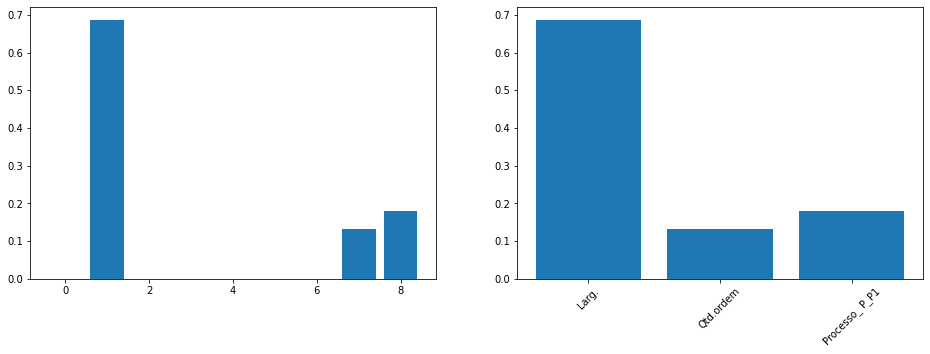

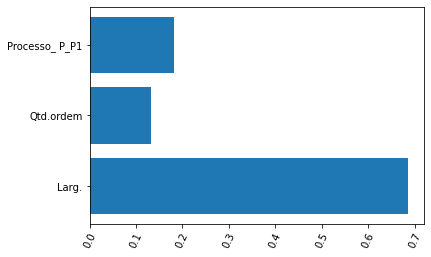

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# define the model
model_name = "CART"
model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, class_weight=class_weight,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

model=grid_search.best_estimator_

# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_enc.columns, importance):
    if abs(v) > 10**(-3):
        ind.append(c) ; res.append(v)
        if v > max_v: max_v = v ; imax = c
        print('%0s,%.5f' % (c,v* 100))
# plot feature importance
fig, (axs1 , axs2) = plt.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
plt.xticks(rotation=45)

# plot feature importance
fig1 = plt.figure()
fig1 = plt.barh(ind, res)
# axs2.bar(ind, res)
plt.xticks(rotation=65)

print("\nMax score:", max_v*100, "(Feature:", imax, ")")

# save the figure
filename = str('plot-'+ model_name + '- ' + w_bins.value + '.png')
plt.savefig(filename)
print("\nFilename: ", filename)

plt.show()

### Prediction

Source: https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/ ; https://rasbt.github.io/mlxtend/

In [ ]:
# make a prediction
y_pred = model.predict(X_test)
# y_pred = best_random.predict(X_test)
# y_pred = best_grid.predict(X_test)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

# Creating the confusion matrix (binary classification)
cm = metrics.confusion_matrix(y_test, y_pred)
# Assigning columns names
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

display(cm_df)

Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.98      0.75      0.85       186
           1       0.34      0.89      0.49        27

    accuracy                           0.77       213
   macro avg       0.66      0.82      0.67       213
weighted avg       0.90      0.77      0.81       213



,Predicted Negative,Predicted Positive
Actual Negative,140,46
Actual Positive,3,24


In [ ]:
y_pred = model.predict(X_test)

def reg_metrics(y_test, y_pred, X_train):
    from sklearn.metrics import mean_squared_error, r2_score 

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print("RMSE: ", rmse, "\nR2: ", r2, "\nAdj_r_sq: ", adj_r_sq)


reg_metrics(y_test, y_pred, X_train)

model.score(X_train,y_train)

RMSE:  0.47963209687927216 
R2:  -1.0782556750298689 
Adj_r_sq:  -1.1703950891937547


0.7623529411764706

In [98]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='auto', min_samples_leaf=4,
                       min_samples_split=5)

Index(['Comp.', 'Larg.', 'Espess.', 'T (ºC)', '%HR', 'week day', 'months',
       'Qtd.ordem', 'Processo_ P_P1'],
      dtype='object')


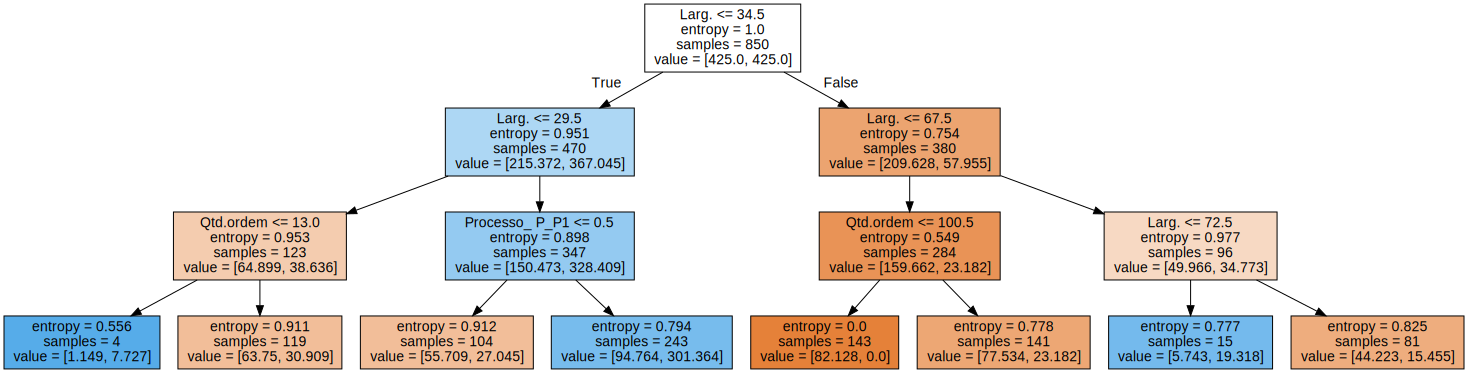

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

print(X_train.columns)

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=X_train.columns, filled = True, max_depth=3), format='png')

img = SVG(graph.pipe(format='svg'))

display(graph)

In [97]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Random Search Cross Validation

In [ ]:
# Number of features to consider at every split
max_features = [None, 'auto']
# Criterion
criterion = ['gini', 'entropy']
# Weight
class_weight = [None, 'balanced']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10, 15, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the random grid
random_grid = {'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'class_weight': class_weight,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'criterion': ['gini', 'entropy'], 'max_features': [None, 'auto'], 'max_depth': [3, 4, 6, 8, 10, 15, None], 'class_weight': [None, 'balanced'], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100,
                               cv = dt_cv.value, verbose=2, random_state=42, n_jobs = -1, scoring=scoring.value)
# Fit the random search model
dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 6, 8, 10, 15, None],
                                        'max_features': [None, 'auto'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [ ]:
dt_random.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Model Performance')
    print('Scoring:', scoring.value)
    print('K-Folds (CV):', dt_cv.value)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("\n", metrics.classification_report(y_test, y_pred))

    return accuracy

base_model = model
base_accuracy = evaluate(base_model, X_test, y_test)

print("-"*60)

best_random = dt_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

print("Selected features: ", selected_data)
print("Feature importance: ", best_random.feature_importances_)

Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.78%.

               precision    recall  f1-score   support

           0       0.97      0.77      0.86       186
           1       0.35      0.85      0.49        27

    accuracy                           0.78       213
   macro avg       0.66      0.81      0.68       213
weighted avg       0.89      0.78      0.81       213

------------------------------------------------------------
Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.77%.

               precision    recall  f1-score   support

           0       0.97      0.76      0.86       186
           1       0.34      0.85      0.49        27

    accuracy                           0.77       213
   macro avg       0.66      0.81      0.67       213
weighted avg       0.89      0.77      0.81       213

Improvement of -0.60%.
Selected features:  ['Processo_ P', 'Comp.', 'Larg.', 'Espess.', 'T (ºC)', '%HR', 'week day', 'month

### Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Number of features to consider at every split
max_features = [None, 'auto']
# Criterion
criterion = ['gini', 'entropy']
# Weight
class_weight = [None, 'balanced']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10, 15, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the parameter grid based on the results of random search
param_grid = {'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'class_weight': class_weight,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,
                          cv = dt_cv.value, n_jobs = -1, verbose = 2, scoring=scoring.value)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

base_model = model
base_accuracy = evaluate(base_model, X_test, y_test)

print("-"*60)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.78%.

               precision    recall  f1-score   support

           0       0.97      0.77      0.86       186
           1       0.35      0.85      0.49        27

    accuracy                           0.78       213
   macro avg       0.66      0.81      0.68       213
weighted avg       0.89      0.78      0.81       213

------------------------------------------------------------
Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.81%.

               precision    recall  f1-score   support

           0       0.97      0.81      0.88       186
           1       0.39      0.81      0.52        27

    accuracy                           0.81       213
   macro avg       0.68      0.81      0.70       213
weighted avg       0.89      0.81      0.84       213

Improvement of 4.22%.


### Results for top 10 models

In [ ]:
df_results = pd.DataFrame(grid_search.cv_results_)

df_results = df_results[['params', 'rank_test_score']]
df_results = df_results[df_results['rank_test_score'] <= 10]
display(df_results)

for par in df_results['params']:
  print("Parameters:", par)
  grid_dt = DecisionTreeClassifier(criterion=par['criterion'], max_depth=par['max_depth'], max_features=par['max_features'],
                                      min_samples_leaf=par['min_samples_leaf'], min_samples_split=par['min_samples_split'], class_weight=par['class_weight'])
  grid_dt.fit(X_train, y_train)

  # make a prediction
  y_pred = grid_dt.predict(X_test)

  # print("Model:", model)
  print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
  print("\n", metrics.classification_report(y_test, y_pred))

  # Creating the confusion matrix (binary classification)
  cm = metrics.confusion_matrix(y_test, y_pred)
  # Assigning columns names
  cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  display(cm_df)
  print("\n\n")

,params,rank_test_score
116,"{'class_weight': 'balanced', 'criterion': 'gin...",7
117,"{'class_weight': 'balanced', 'criterion': 'gin...",2
119,"{'class_weight': 'balanced', 'criterion': 'gin...",3
125,"{'class_weight': 'balanced', 'criterion': 'gin...",8
127,"{'class_weight': 'balanced', 'criterion': 'gin...",4
172,"{'class_weight': 'balanced', 'criterion': 'ent...",10
173,"{'class_weight': 'balanced', 'criterion': 'ent...",5
174,"{'class_weight': 'balanced', 'criterion': 'ent...",1
175,"{'class_weight': 'balanced', 'criterion': 'ent...",6
181,"{'class_weight': 'balanced', 'criterion': 'ent...",9


Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy score: 0.7934272300469484

               precision    recall  f1-score   support

           0       0.97      0.78      0.87       186
           1       0.37      0.85      0.51        27

    accuracy                           0.79       213
   macro avg       0.67      0.82      0.69       213
weighted avg       0.90      0.79      0.82       213



,Predicted Negative,Predicted Positive
Actual Negative,146,40
Actual Positive,4,23





Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy score: 0.812206572769953

               precision    recall  f1-score   support

           0       0.97      0.81      0.88       186
           1       0.39      0.85      0.53        27

    accuracy                           0.81       213
   macro avg       0.68      0.83      0.71       213
weighted avg       0.90      0.81      0.84       213



,Predicted Negative,Predicted Positive
Actual Negative,150,36
Actual Positive,4,23





Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score: 0.7323943661971831

               precision    recall  f1-score   support

           0       0.96      0.72      0.82       186
           1       0.30      0.81      0.44        27

    accuracy                           0.73       213
   macro avg       0.63      0.77      0.63       213
weighted avg       0.88      0.73      0.78       213



,Predicted Negative,Predicted Positive
Actual Negative,134,52
Actual Positive,5,22





Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy score: 0.812206572769953

               precision    recall  f1-score   support

           0       0.97      0.81      0.88       186
           1       0.39      0.85      0.53        27

    accuracy                           0.81       213
   macro avg       0.68      0.83      0.71       213
weighted avg       0.90      0.81      0.84       213



,Predicted Negative,Predicted Positive
Actual Negative,150,36
Actual Positive,4,23





Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score: 0.6713615023474179

               precision    recall  f1-score   support

           0       0.98      0.64      0.77       186
           1       0.26      0.89      0.41        27

    accuracy                           0.67       213
   macro avg       0.62      0.76      0.59       213
weighted avg       0.89      0.67      0.73       213



,Predicted Negative,Predicted Positive
Actual Negative,119,67
Actual Positive,3,24





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.97      0.76      0.85       186
           1       0.34      0.85      0.48        27

    accuracy                           0.77       213
   macro avg       0.66      0.80      0.67       213
weighted avg       0.89      0.77      0.81       213



,Predicted Negative,Predicted Positive
Actual Negative,141,45
Actual Positive,4,23





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy score: 0.784037558685446

               precision    recall  f1-score   support

           0       0.97      0.78      0.86       186
           1       0.35      0.81      0.49        27

    accuracy                           0.78       213
   macro avg       0.66      0.80      0.68       213
weighted avg       0.89      0.78      0.82       213



,Predicted Negative,Predicted Positive
Actual Negative,145,41
Actual Positive,5,22





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy score: 0.7323943661971831

               precision    recall  f1-score   support

           0       0.98      0.71      0.82       186
           1       0.31      0.89      0.46        27

    accuracy                           0.73       213
   macro avg       0.64      0.80      0.64       213
weighted avg       0.89      0.73      0.78       213



,Predicted Negative,Predicted Positive
Actual Negative,132,54
Actual Positive,3,24





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score: 0.568075117370892

               precision    recall  f1-score   support

           0       0.97      0.52      0.68       186
           1       0.21      0.89      0.34        27

    accuracy                           0.57       213
   macro avg       0.59      0.71      0.51       213
weighted avg       0.87      0.57      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,97,89
Actual Positive,3,24





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy score: 0.6854460093896714

               precision    recall  f1-score   support

           0       0.97      0.66      0.79       186
           1       0.27      0.85      0.41        27

    accuracy                           0.69       213
   macro avg       0.62      0.76      0.60       213
weighted avg       0.88      0.69      0.74       213



,Predicted Negative,Predicted Positive
Actual Negative,123,63
Actual Positive,4,23


In [ ]:
print(df_results.iloc[1]['params'])

grid_search.best_params_

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5}


### Print results and specifications

Write results in file: *results.txt*

In [ ]:
for writing_model in [base_model, best_grid, best_random]:

  # make a prediction
  y_pred = writing_model.predict(X_test)

  accuracy_score = metrics.accuracy_score(y_test, y_pred)
  evaluation = metrics.classification_report(y_test, y_pred)

  # # Creating the confusion matrix (binary classification)
  # cm = metrics.confusion_matrix(y_test, y_pred)
  # # Assigning columns names
  # cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  # Creating the confusion matrix (multi-class classification)
  from mlxtend.evaluate import confusion_matrix
  cml2 = confusion_matrix(y_target=y_test, y_predicted=y_pred, binary=True, positive_label=0)

  # Assigning columns names
  cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

  with open('results.txt', 'a') as f:
      f.write('-'*50)
      f.write("\n\nModel: %s" % writing_model)
      f.write("\n\nRandom: %s; Test size: %d" % (shuffle, test_size))
      f.write("\nMax score: %d ; (Feature: %s)" % (max_v*100,imax))

      f.write("\n\nAccuracy score: %d" % accuracy_score)
      f.write("\nScoring criteria optimized: %s" % scoring.value)
      f.write("\nK-Folds (CV): %s" % dt_cv.value)
      f.write("\n%s" % str(evaluation))
      f.write("\n\nConfusion matrix ")
      # save confusion matrix and slice into four pieces
      # TP = cm[1][1]; TN = cm[0][0] ; FP = cm[0][1] ; FN = cm[1][0]
      TP = cml2[0][0] ; TN = cml2[1][1] ; FP = cml2[1][0] ; FN = cml2[0][1]

      f.write('\nTrue Positives: %d' % TP)
      f.write('\nTrue Negatives: %d' % TN)
      f.write('\nFalse Positives: %d' % FP)
      f.write('\nFalse Negatives: %d\n\n' % FN)

  display(Markdown('#### Results'))

  print("Model:", writing_model)
  print("Shuffle:", shuffle, "; Test size:", test_size)
  print("Max score:", max_v*100, "(Feature:", imax, ")")

  print("\nAccuracy score:", accuracy_score)
  print('Scoring criteria optimized: ', scoring.value)
  print('K-Folds (CV):', dt_cv.value)
  print("\n", evaluation)

#### Results

Model: DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
Shuffle: True ; Test size: 0.19999999999999996
Max score: 33.61259874717438 (Feature: Qtd.ordem )

Accuracy score: 0.7080405932864949
Scoring criteria optimized:  balanced_accuracy
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



#### Results

Model: DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
Shuffle: True ; Test size: 0.19999999999999996
Max score: 33.61259874717438 (Feature: Qtd.ordem )

Accuracy score: 0.7080405932864949
Scoring criteria optimized:  balanced_accuracy
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



#### Results

Model: DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
Shuffle: True ; Test size: 0.19999999999999996
Max score: 33.61259874717438 (Feature: Qtd.ordem )

Accuracy score: 0.7080405932864949
Scoring criteria optimized:  balanced_accuracy
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



### Binary Classification

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics

# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Assigning columns names
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,2277,1369
Actual Positive,884,2037


In [ ]:
# save confusion matrix and slice into four pieces
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity (recall)
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 2037
True Negatives: 2277
False Positives: 1369
False Negatives: 884
-------------------------
Accuracy: 0.66
Mis-Classification: 0.34
Sensitivity: 0.7
Specificity: 0.62
Precision: 0.6
f_1 Score: 0.64


### Multi-class Classification

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

cml = metrics.confusion_matrix(y_test, y_pred, labels=labels_3)

# Assigning columns names
cml_df = pd.DataFrame(cml)

# Showing the confusion matrix
# cm_df
display(cml_df)

,0,1,2
0,1977,720,895
1,313,734,545
2,313,403,667


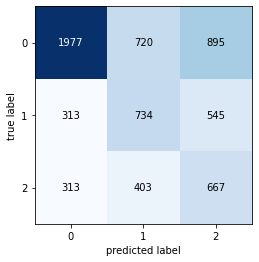

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cml)

# save the figure
plt.savefig(str('plot-'+ model_name + '-cm-1- ' + w_bins.value + '.png'))

plt.show()

In [ ]:
from mlxtend.evaluate import confusion_matrix
cml2 = confusion_matrix(y_target=y_test,
                      y_predicted=y_pred,
                      binary=True,
                      positive_label=0)

# Assigning columns names
cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

# Showing the confusion matrix
cml2_df

# fig, ax = plot_confusion_matrix(conf_mat=cml2)

# # save the figure
# plt.savefig(str('plot-CART-cm-2-' + 'bins-6s' + '.png'))

# plt.show()

,Predicted Positive,Predicted Negative
Actual Positive,2349,626
Actual Negative,1615,1977


In [ ]:
# save confusion matrix and slice into four pieces
TP = cml2[0][0]
TN = cml2[1][1]
FP = cml2[1][0]
FN = cml2[0][1]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 503
True Negatives: 289
False Positives: 353
False Negatives: 280
-------------------------
Accuracy: 0.56
Mis-Classification: 0.44
Sensitivity: 0.64
Specificity: 0.45
Precision: 0.59
f_1 Score: 0.61


### Feature Importance

In [ ]:
# Fazer Feature Importance para modelos com melhores resultados

## Feature Selection

In [ ]:
# load dataset
data = df

# feature matrix
feature_selected = ind
X_train_fsel = X_train[feature_selected]
X_test_fsel = X_test[feature_selected]

print("\nFeature Selection --> X_train (shape):", X_train_fsel.shape, "; X_train (shape):", X_test_fsel.shape)
display(X_train_fsel.head())


Feature Selection --> X_train (shape): (10887, 10) ; X_train (shape): (1922, 10)


,Mês,dim1,dim2,dim3,dim1_1,Difference,Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO,Tipo de operação_APLICAÇÃO DE VERNIZ,Tipo de operação_CORTE DE FOLHA,Tipo de operação_EMBALAMENTO
6858,4.0,833.0,797.0,0.18,52.0,4.0,0,0,0,0
26249,12.0,833.0,756.8,0.18,65.0,0.0,0,1,0,0
21375,10.0,833.0,716.6,0.18,52.0,1.0,0,1,0,0
17729,9.0,931.0,777.5,0.17,49.0,3.0,0,0,0,1
5725,3.0,833.0,798.2,0.18,65.0,0.0,0,1,0,0


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=2, min_samples_split=10)
Feature: Mês, Score: 3.53584
Feature: dim1, Score: 2.57513
Feature: dim2, Score: 4.96615
Feature: dim3, Score: 1.62263
Feature: dim1_1, Score: 0.71080
Feature: Difference, Score: 18.86512
Feature: Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO, Score: 10.63341
Feature: Tipo de operação_APLICAÇÃO DE VERNIZ, Score: 10.41789
Feature: Tipo de operação_CORTE DE FOLHA, Score: 22.40875
Feature: Tipo de operação_EMBALAMENTO, Score: 24.26429

Max score: 24.26429254846065 (Feature: Tipo de operação_EMBALAMENTO )

Filename:  plot-FSelect-CART- 2 levels.png


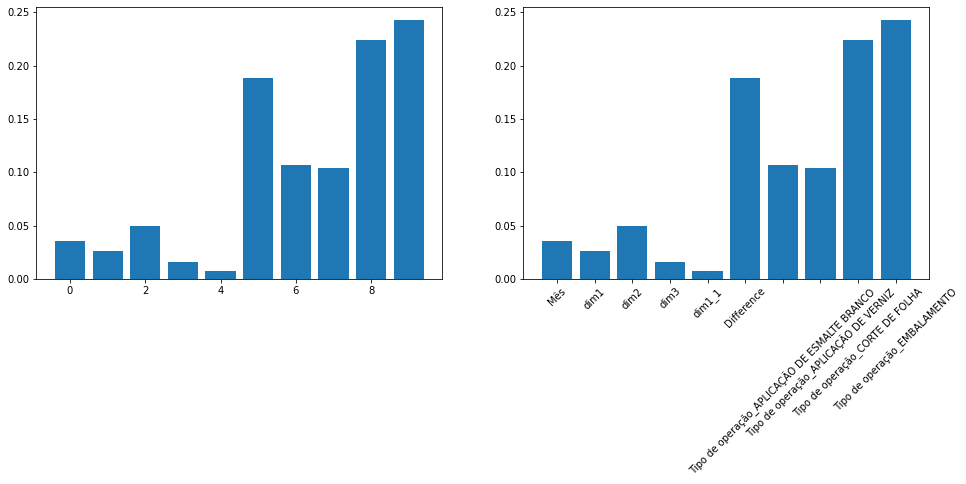

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model_name = "CART"
model_fsel = grid_search.best_estimator_
# print(grid_search.best_params_, "\n")
# base_model = model
# model_fsel = base_model
print(model_fsel)

# fit the model
model_fsel.fit(X_train_fsel, y_train)
# get importance
importance = model_fsel.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_train_fsel.columns, importance):
    ind.append(c) ; res.append(v)
    if v > max_v: max_v = v ; imax = c
    print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = plt.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
plt.xticks(rotation=45)

print("\nMax score:", max_v*100, "(Feature:", imax, ")")

# save the figure
filename = str('plot-FSelect-'+ model_name + '- ' + w_bins.value + '.png')
plt.savefig(filename)
print("\nFilename: ", filename)

plt.show()

In [ ]:
# make a prediction
y_pred = model_fsel.predict(X_test_fsel)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

Accuracy score: 0.6940686784599376

               precision    recall  f1-score   support

           0       0.76      0.65      0.70      1055
           1       0.64      0.75      0.69       867

    accuracy                           0.69      1922
   macro avg       0.70      0.70      0.69      1922
weighted avg       0.70      0.69      0.69      1922



### Display Tree

[Visualization of decision trees](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

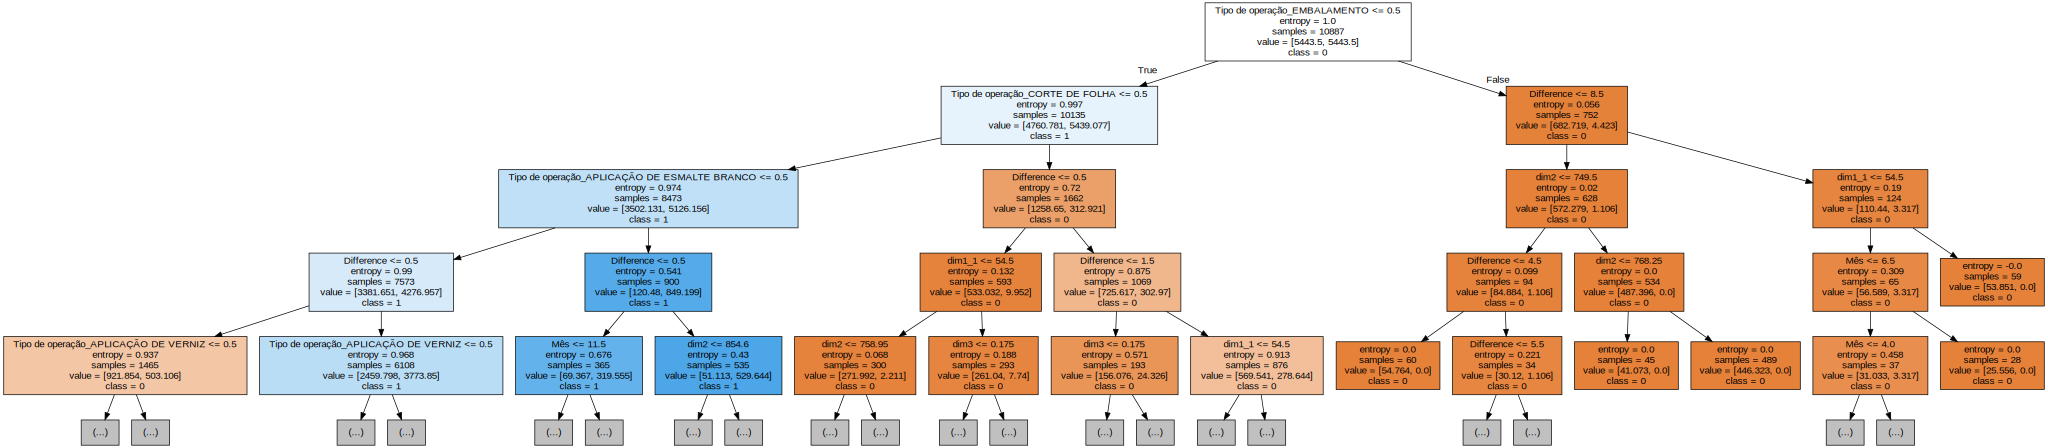

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = X_train_fsel.columns

graph = Source(tree.export_graphviz(model_fsel, out_file=None
   , feature_names=labels, filled = True, class_names=['0', '1'], max_depth=4))

display(SVG(graph.pipe(format='svg')))
